<a href="https://colab.research.google.com/github/mzafir/aps/blob/master/Mohammad_Asim_Zafir_ML_MINIPROJECT_2_03_28_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Node 1 > Degree , eigen_vector_centrality ,Clustering Coefficient , DeepWalk
!pip install networkx pandas numpy scikit-learn


**Steps**
1. Load The Graph Data
2. Generate the Node features ( Understand what each Node does)
3. Check for missing values, any duplicate rows ? (Scale?)
4. Plot historgram for each feature
5. Plot scatter plots between each feature. Any insights?
6. Test Kmeans ( Use Elbow Method to find a good K)
7. Plot graphs visualzing the different clusters


In [2]:
import networkx as nx

# Load The Graph

G = nx.read_edgelist("facebook_combined.txt",create_using=nx.Graph(),nodetype=int)

print(f"Numer of Edges : {G.number_of_edges()}")
print(f"Number of Nodes : {G.number_of_nodes()}")


Numer of Edges : 88234
Number of Nodes : 4039


In [44]:
import networkx as nx
import random

# Assuming 'G' is your original graph with 4000 nodes
G = nx.generators.random_graphs.erdos_renyi_graph(4000, 0.01)

# Randomly sample 400 nodes
sampled_nodes = random.sample(G.nodes(), 400)

# Create a subgraph with the sampled nodes
subG = G.subgraph(sampled_nodes)

# Now, 'subG' is your smaller graph with approximately 400 nodes


<ipython-input-44-75a09fb5d1aa>:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sampled_nodes = random.sample(G.nodes(), 400)


NOTE: Initiliazing the networkx library and reading the dataset into the Graph object "G".

In this step - identify number of edges inbound to a given Node and also identify total number of edges as well as nodes


# EDA AND FEATURE ENGINEERING

In [3]:
# Node Degree
degree_dict = dict(G.degree())

#Clustering Coefficient
clustering_dict = dict(nx.clustering(G))

# EigenVector Centrality
eigen_vector_centrality = nx.eigenvector_centrality(G)

#Average Neighbor Degree
average_neighbor_degree_dict = nx.average_neighbor_degree(G)

#Degree Centrality
degree_centrality_dict = nx.degree_centrality(G)

#Eccentricity
eccentricity_dict = nx.eccentricity(G)

#Closeness Centrality
closeness_centrality_dict = nx.closeness_centrality(G)

#Betweeness Centrality
betweenness_centrality_dict = nx.betweenness_centrality(G)



In [4]:

# Degree: This is the most basic and intuitive measure of a node's connectivity; it counts how many connections (edges) a node has.
#In undirected graphs, it simply counts all the edges attached to a node. In directed graphs, you can have in-degree and out-degree, counting incoming and outgoing connections separately.

# Clustering Coefficient: This measures the degree to which nodes in a graph tend to cluster together. Specifically, for a given node, it represents the likelihood that its neighbors are also connected with each other. It's a measure of the local group cohesiveness around a node.

# Average Neighbor Degree: This metric calculates the average degree of all the neighbors of each node. It provides insight into the connectivity of a node's immediate network, indicating whether a node is surrounded by highly connected or sparsely connected nodes.

# Degree Centrality: Similar to the degree but normalized to lie between 0 and 1, degree centrality measures a node's relative importance based on the number of connections it has to other nodes in the network. It's calculated as the degree of the node divided by the maximum possible degree in the graph.

# Eccentricity: This metric measures the greatest distance between a node and all other nodes in the graph. In other words, it's the maximum number of edges that need to be traversed to reach the furthest node in the graph from the given node. Nodes with low eccentricity are more central because they are closer to all other nodes.

# Closeness Centrality: This metric measures how close a node is to all other nodes in the network, calculated as the reciprocal of the sum of the shortest path distances from a node to all other nodes. It reflects how easily a node can reach all other nodes, with higher values indicating shorter paths to all others, implying a more central position in the network.

# Betweenness Centrality: This measures the extent to which a node lies on the shortest paths between other nodes. It quantifies the number of times a node acts as a bridge along the shortest path between two other nodes. This metric identifies nodes that serve as critical connectors or 'bottlenecks' in the network, through which a large amount of network traffic can flow.



import pandas as pd


features_df = pd.DataFrame({
    "Degree" : pd.Series(degree_dict),
    "Clustering_Coefficient" : pd.Series(clustering_dict),
    "EigenVector_Centrality" : pd.Series(eigen_vector_centrality),
    "Average Neighbor Degree": pd.Series(average_neighbor_degree_dict),
    "Degree Centrality"     : pd.Series(degree_centrality_dict),
    "Eccentricity"          : pd.Series(eccentricity_dict),
    "Closeness Centrality"   : pd.Series(closeness_centrality_dict),
    "Betweenness Centrality" : pd.Series(betweenness_centrality_dict),
})



In [5]:
features_df.head()

,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality
0,347,0.041962,3.391796e-05,18.959654,0.085934,6,0.353343,1.463059e-01
1,17,0.419118,6.045346e-07,48.235294,0.004210,7,0.261376,2.783274e-06
2,10,0.888889,2.233461e-07,49.900000,0.002476,7,0.261258,7.595021e-08
3,17,0.632353,6.635648e-07,59.764706,0.004210,7,0.261376,1.685066e-06
4,10,0.866667,2.236416e-07,42.600000,0.002476,7,0.261258,1.840332e-07


In [6]:

features_df.describe()

#checking for missing values and analyzing the dataset

,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality
count,4039.000000,4039.000000,4.039000e+03,4039.000000,4039.000000,4039.000000,4039.000000,4.039000e+03
mean,43.691013,0.605547,3.864341e-03,105.551793,0.010820,6.354048,0.276168,6.669574e-04
std,52.420605,0.214462,1.525485e-02,91.313039,0.012982,0.619101,0.036124,1.164634e-02
min,1.000000,0.000000,6.385265e-14,6.016949,0.000248,4.000000,0.178255,0.000000e+00
25%,11.000000,0.466667,5.388575e-08,61.474571,0.002724,6.000000,0.260348,3.997507e-07
50%,25.000000,0.600000,8.885652e-07,83.500000,0.006191,6.000000,0.282457,2.918300e-06
75%,57.000000,0.752381,3.266349e-05,126.699028,0.014116,7.000000,0.315001,1.515292e-05
max,1045.000000,1.000000,9.540696e-02,1045.000000,0.258791,8.000000,0.459699,4.805181e-01


In [7]:
#NON SCALED FEATURE DATAFRAME
features_df

,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality
0,347,0.041962,3.391796e-05,18.959654,0.085934,6,0.353343,1.463059e-01
1,17,0.419118,6.045346e-07,48.235294,0.004210,7,0.261376,2.783274e-06
2,10,0.888889,2.233461e-07,49.900000,0.002476,7,0.261258,7.595021e-08
3,17,0.632353,6.635648e-07,59.764706,0.004210,7,0.261376,1.685066e-06
4,10,0.866667,2.236416e-07,42.600000,0.002476,7,0.261258,1.840332e-07
...,...,...,...,...,...,...,...,...
4034,2,1.000000,2.951270e-10,38.500000,0.000495,8,0.183989,0.000000e+00
4035,1,0.000000,2.912901e-10,59.000000,0.000248,8,0.183980,0.000000e+00
4036,2,1.000000,2.931223e-10,31.500000,0.000495,8,0.183989,0.000000e+00
4037,4,0.666667,2.989233e-10,23.250000,0.000991,8,0.184005,7.156847e-08


In [8]:
#SCALING METHODS USED
# Min Max , Bound you data between 0 and 1 (x - x_min) / (x_max - x_min)
# Standard Scaling . (X- mean / standard deviation)



In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

features_scaled = scaler.fit_transform(features_df)
features_scaled

#standard scalar : this has a guassian distribution property and ideally all features are centered around mean=0 bounds: (-1,1)
#min-max: bounds (0,1)

array([[ 5.7867806 , -2.62822483, -0.25112646, ..., -0.57194482,
         2.13664867, 12.50667395],
       [-0.50923329, -0.86939407, -0.25331052, ...,  1.04349933,
        -0.40951786, -0.05703562],
       [-0.6427851 ,  1.321339  , -0.25333552, ...,  1.04349933,
        -0.41279521, -0.05726811],
       ...,
       [-0.79541574,  1.839495  , -0.25335014, ...,  2.65894348,
        -2.55205079, -0.05727463],
       [-0.75725808,  0.28502701, -0.25335014, ...,  2.65894348,
        -2.55158655, -0.05726849],
       [-0.66186393, -0.23312899, -0.2533501 , ...,  2.65894348,
        -2.55042558, -0.0572202 ]])

In [10]:
features_scaled = pd.DataFrame(features_scaled,columns=features_df.columns)
features_scaled

,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality
0,5.786781,-2.628225,-0.251126,-0.948417,5.786781,-0.571945,2.136649,12.506674
1,-0.509233,-0.869394,-0.253311,-0.627770,-0.509233,1.043499,-0.409518,-0.057036
2,-0.642785,1.321339,-0.253336,-0.609537,-0.642785,1.043499,-0.412795,-0.057268
3,-0.509233,0.125008,-0.253307,-0.501492,-0.509233,1.043499,-0.409518,-0.057130
4,-0.642785,1.217708,-0.253335,-0.689492,-0.642785,1.043499,-0.412795,-0.057259
...,...,...,...,...,...,...,...,...
4034,-0.795416,1.839495,-0.253350,-0.734398,-0.795416,2.658943,-2.552051,-0.057275
4035,-0.814495,-2.823909,-0.253350,-0.509868,-0.814495,2.658943,-2.552283,-0.057275
4036,-0.795416,1.839495,-0.253350,-0.811067,-0.795416,2.658943,-2.552051,-0.057275
4037,-0.757258,0.285027,-0.253350,-0.901426,-0.757258,2.658943,-2.551587,-0.057268


In [11]:
import plotly.express as px


In [14]:

#normalized_df = (features_df - features_df.min()) / (features_df.max() - features_df.min())

#chosed to moved on with standard scalar only but tried min / max as well.

In [17]:
features_scaled = pd.DataFrame(features_scaled,columns=features_df.columns)
features_scaled

,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality
0,5.786781,-2.628225,-0.251126,-0.948417,5.786781,-0.571945,2.136649,12.506674
1,-0.509233,-0.869394,-0.253311,-0.627770,-0.509233,1.043499,-0.409518,-0.057036
2,-0.642785,1.321339,-0.253336,-0.609537,-0.642785,1.043499,-0.412795,-0.057268
3,-0.509233,0.125008,-0.253307,-0.501492,-0.509233,1.043499,-0.409518,-0.057130
4,-0.642785,1.217708,-0.253335,-0.689492,-0.642785,1.043499,-0.412795,-0.057259
...,...,...,...,...,...,...,...,...
4034,-0.795416,1.839495,-0.253350,-0.734398,-0.795416,2.658943,-2.552051,-0.057275
4035,-0.814495,-2.823909,-0.253350,-0.509868,-0.814495,2.658943,-2.552283,-0.057275
4036,-0.795416,1.839495,-0.253350,-0.811067,-0.795416,2.658943,-2.552051,-0.057275
4037,-0.757258,0.285027,-0.253350,-0.901426,-0.757258,2.658943,-2.551587,-0.057268


# DATASET VISUALIZATION

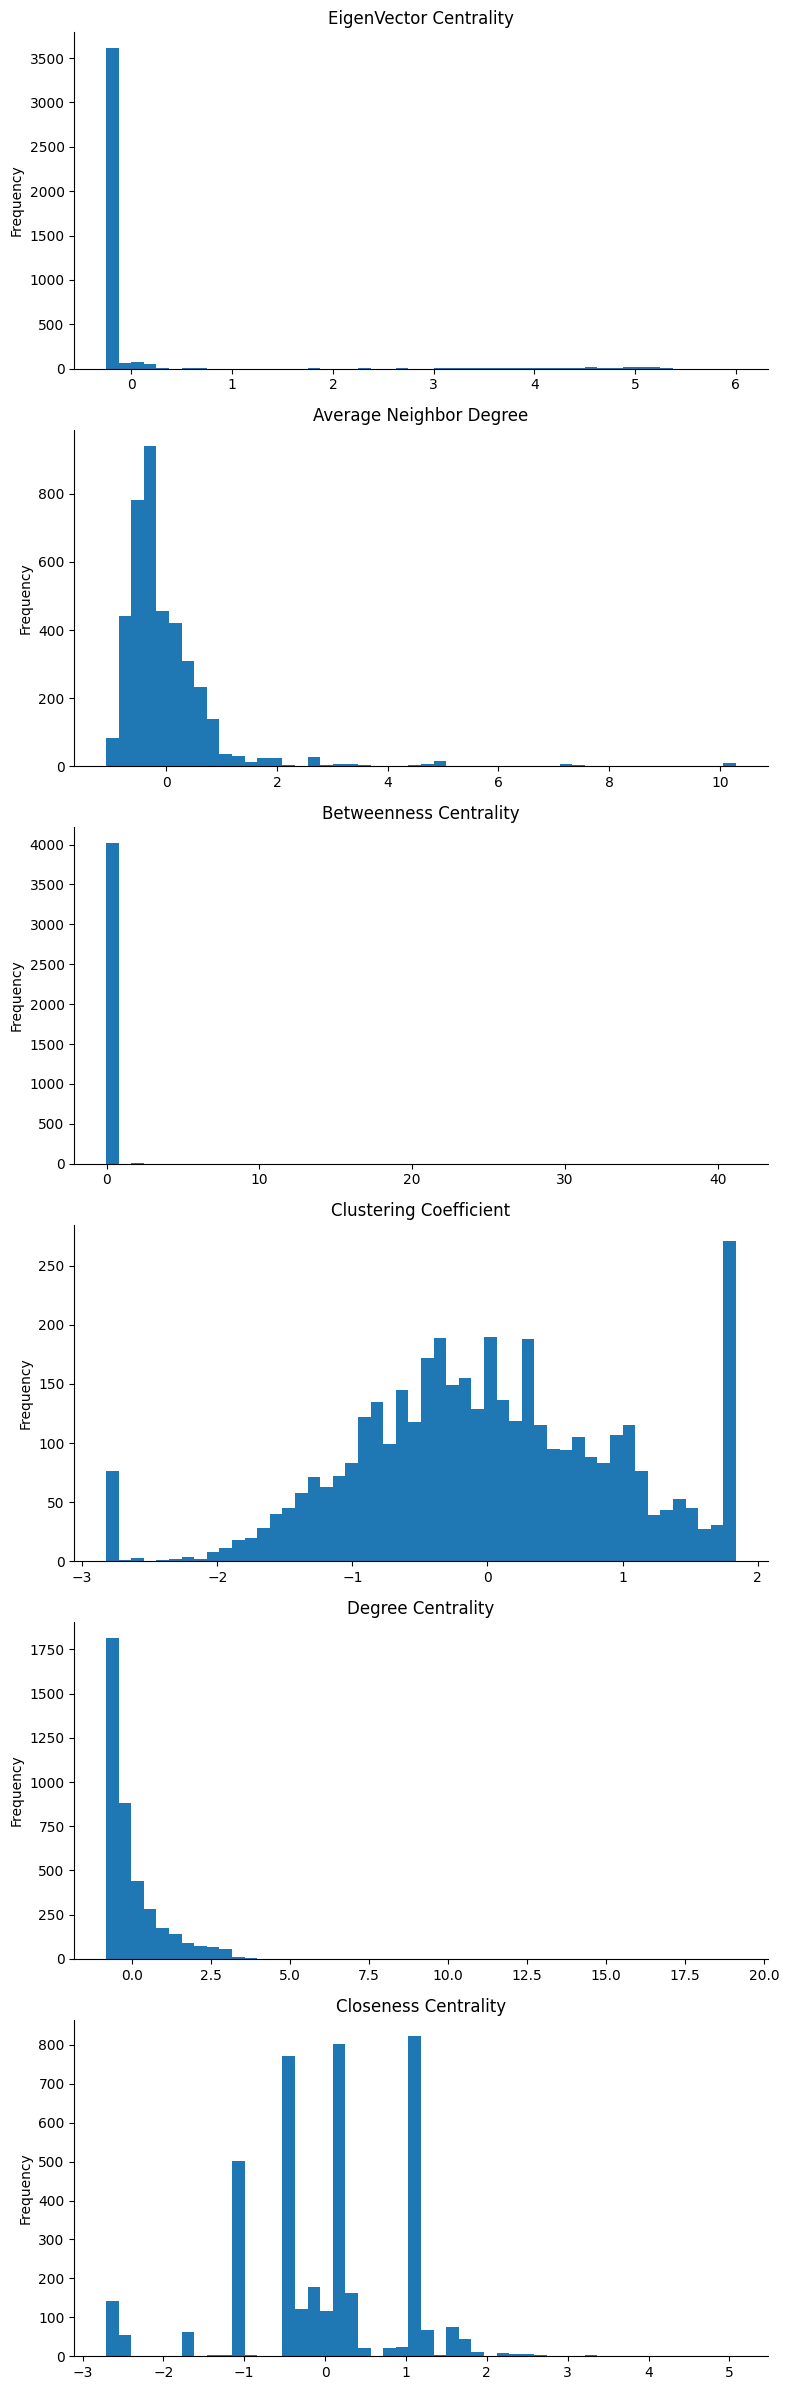

In [18]:
#Plotting standardized  feature values

from matplotlib import pyplot as plt


fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(8, 24))  # Adjust figsize as needed

features = [
    'EigenVector_Centrality',
    'Average Neighbor Degree',
    'Betweenness Centrality',
    'Clustering_Coefficient',
    'Degree Centrality',
    'Closeness Centrality'
]

titles = [
    'EigenVector Centrality',
    'Average Neighbor Degree',
    'Betweenness Centrality',
    'Clustering Coefficient',
    'Degree Centrality',
    'Closeness Centrality'
]

for ax, feature, title in zip(axes.flatten(), features, titles):
    if feature in features_scaled.columns:  # Check if the column exists
        features_scaled[feature].plot(kind='hist', bins=50, title=title, ax=ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [19]:
mean_table=[]
mean_table.append(features_scaled['Degree'].mean())
mean_table.append(features_scaled['Average Neighbor Degree'].mean())
mean_table.append(features_scaled['Betweenness Centrality'].mean())
mean_table.append(features_scaled['Closeness Centrality'].mean())
mean_table.append(features_scaled['Degree Centrality'].mean())
mean_table.append(features_scaled['Eccentricity'].mean())
mean_table.append(features_scaled['EigenVector_Centrality'].mean())


In [20]:
mean_table

[5.10169332434833e-17,
 4.222091027046894e-17,
 0.0,
 -3.0962000865010555e-16,
 2.286965972983734e-17,
 -6.051663805433881e-16,
 -1.407363675682298e-17]

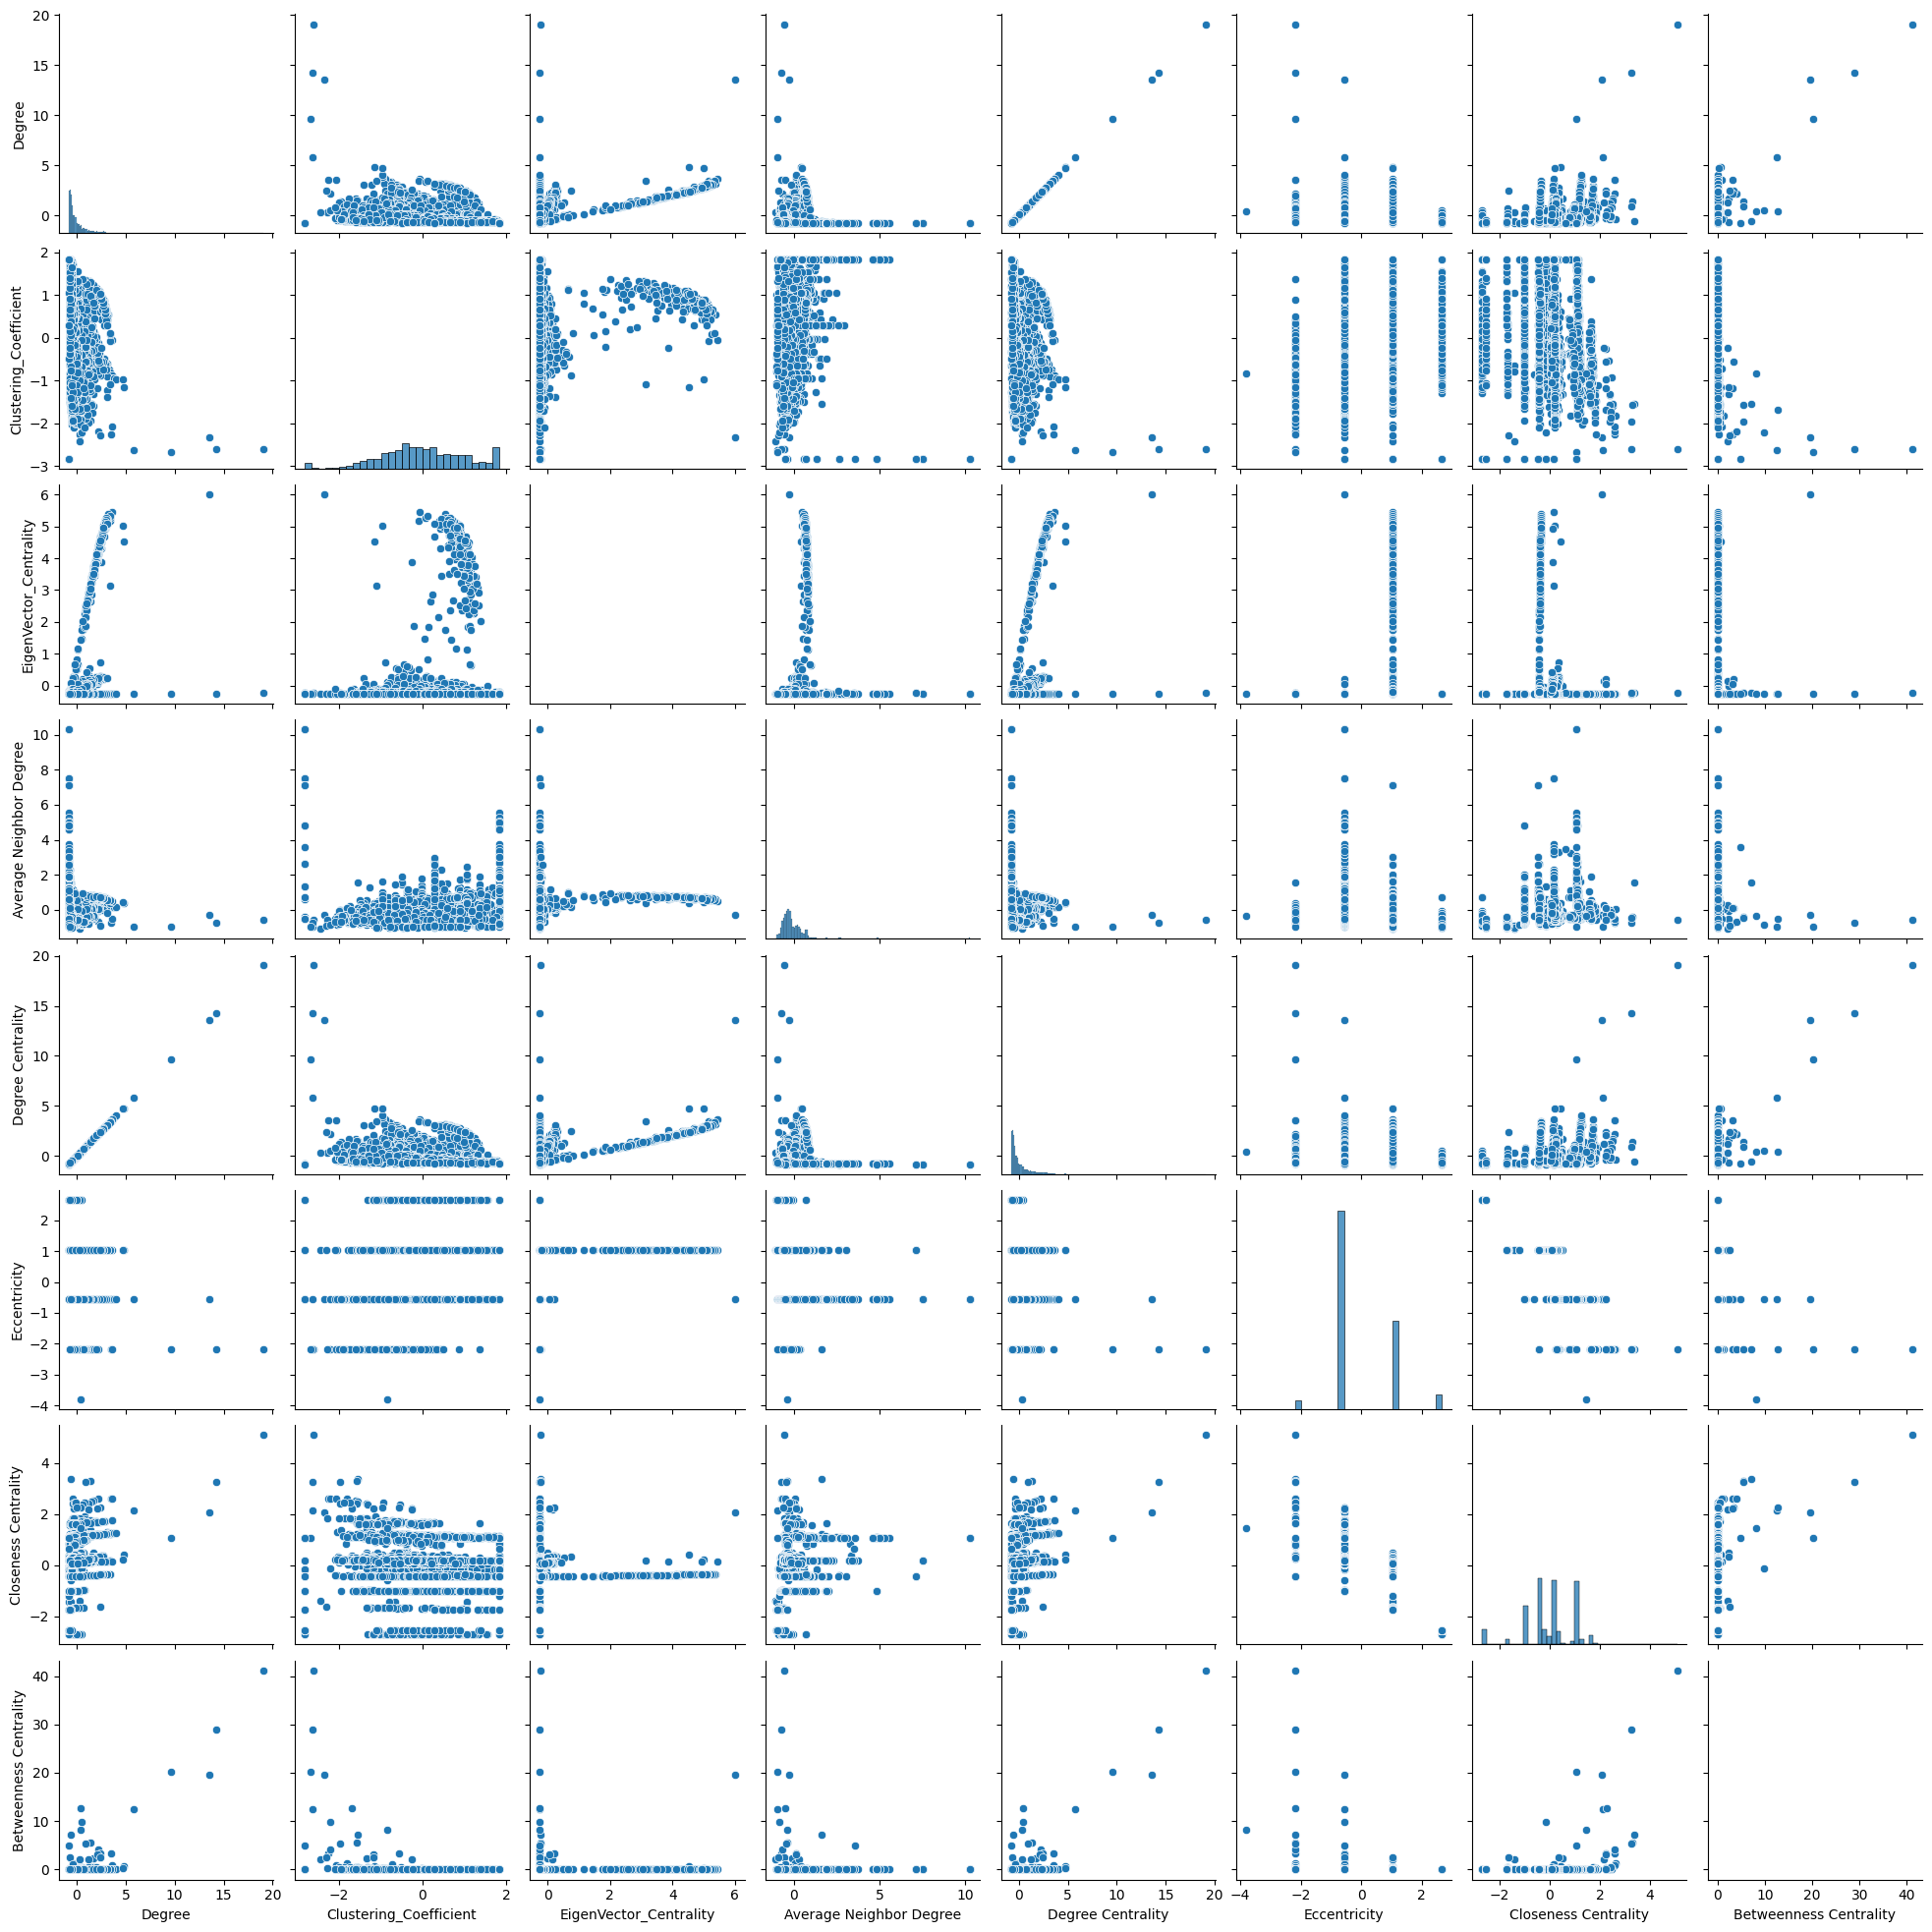

In [22]:
import seaborn as sns

sns.pairplot(features_scaled)



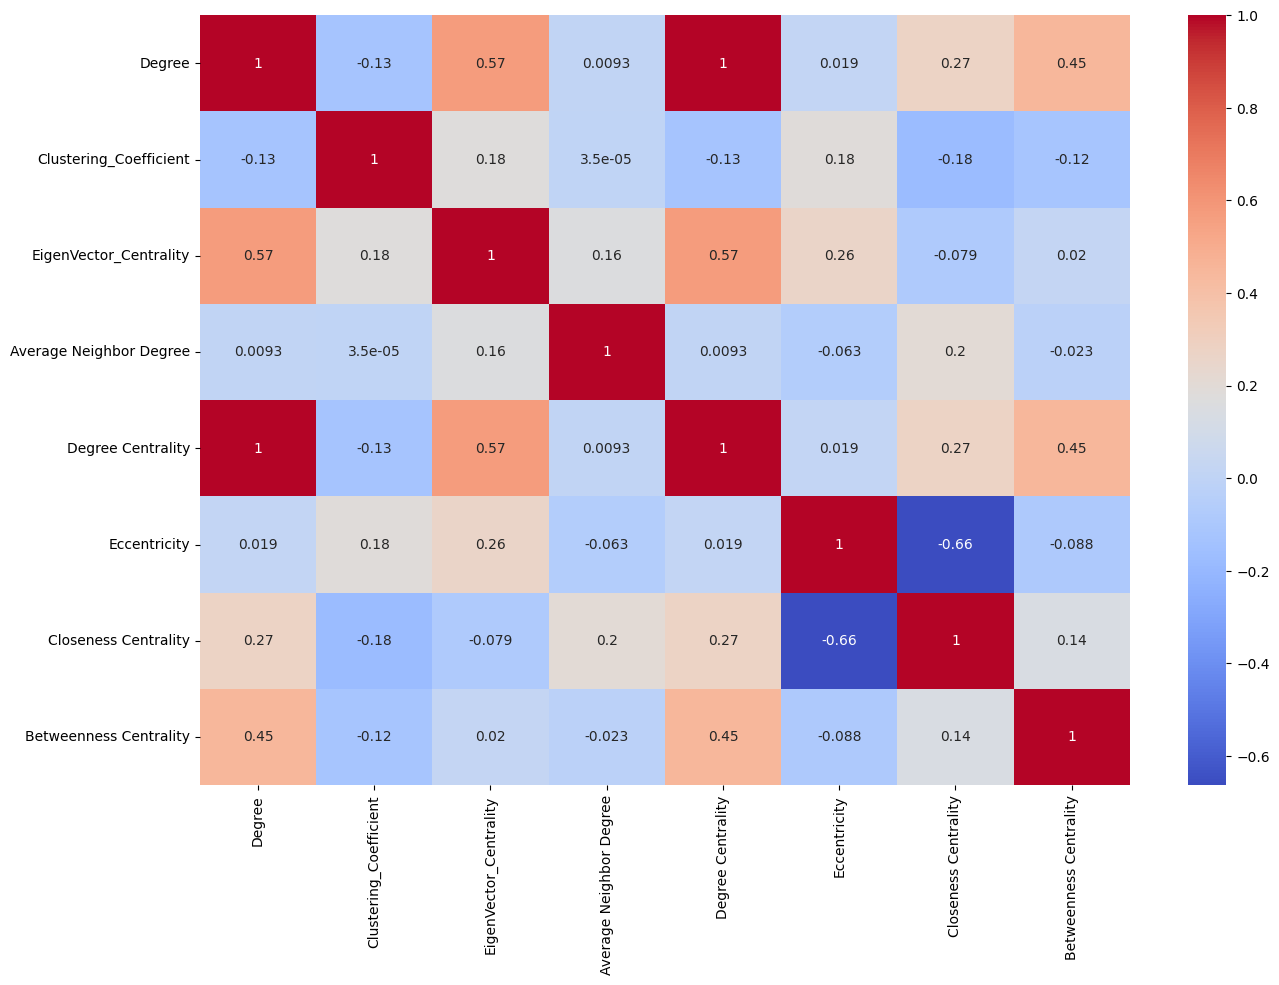

{'Degree Centrality'}


In [23]:
threshold_val=0.9

correlation_matrix=features_scaled.corr()

correlation_matrix

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm')
plt.show()

highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold_val:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print(highly_correlated_features)


# **CLUSTERING METHODS- "K-MEANS"**

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

features_df['Cluster'] = kmeans.fit_predict(features_df)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
features_df['Cluster'].value_counts()

1    3028
0     955
2      56
Name: Cluster, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

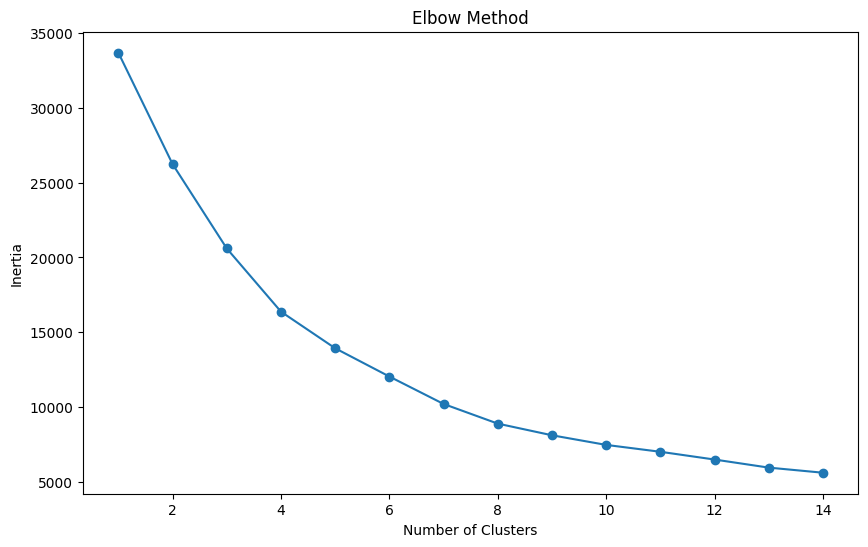

In [65]:
from matplotlib import pyplot as plt
wss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(features_scaled)
    wss.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.plot(range(1,15),wss,marker='o')
plt.title('Elbow Method')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

# NOTE: The technique used in this method is by employing EBLOW METHOD, we identify number for cluster for Kmeans algorith by identifying the biggest intertia drop from the ELBOW plot. This number will be then used by the Kmean clustering algorithm. as it is event the relatively larger drop is between 3 to 5 - hence N value for Kmeans is taken as 3

**Feature Relationship Visualization **

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)

features_scaled['Cluster'] = kmeans.fit_predict(features_scaled)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


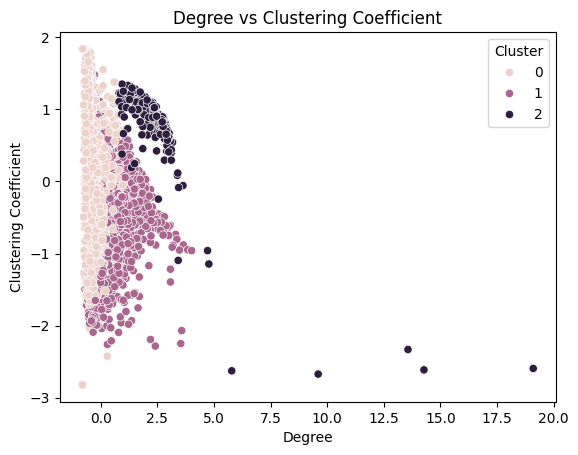

In [28]:
sns.scatterplot(data=features_scaled,x='Degree',y='Clustering_Coefficient',hue="Cluster")
plt.title("Degree vs Clustering Coefficient")
plt.xlabel('Degree')
plt.ylabel('Clustering Coefficient')
plt.legend(title="Cluster")
plt.show()

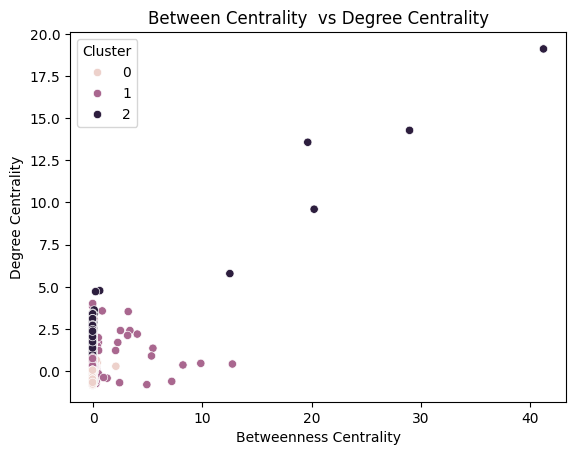

In [66]:
sns.scatterplot(data=features_scaled,x='Betweenness Centrality',y='Degree Centrality',hue="Cluster")
plt.title("Between Centrality  vs Degree Centrality")
plt.xlabel('Betweenness Centrality')
plt.ylabel('Degree Centrality')
plt.legend(title="Cluster")
plt.show()

# CLUSTER VALIDATION TECHNIQUES

In [29]:
cluster_labels = kmeans.labels_


In [30]:
from sklearn.metrics import silhouette_score

score = silhouette_score(features_scaled, cluster_labels)
score

0.3085902950154001

 silhouette score of 0.3085902950154001 suggests that, on average, the clusters are moderately well defined but not perfectly distinct.

In [31]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(features_scaled, cluster_labels)
db_index

1.1365278449188165

A Davies-Bouldin Index of 1.1365278449188165 indicates a moderate level of cluster compactness and separation. It suggests that there's room for improvement, but the clusters are not excessively overlapped or too spread out.

In [32]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(features_scaled, cluster_labels)
ch_index


1280.9232666039757

A Calinski-Harabasz score of 1280.9232666039757 is relatively high, suggesting that, on average,  clusters are quite compact and well-separated from each other.

Text(0.5, 1.0, 't-SNE Visualization of Clusters')

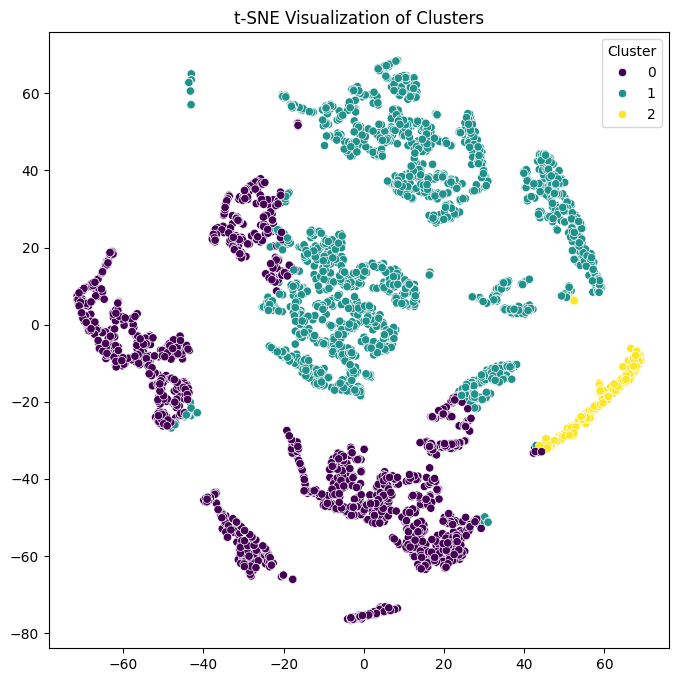

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features_scaled.drop('Cluster', axis=1))

plt.figure(figsize=(8, 8))
sns.scatterplot(x=tsne_results[:, 0], y=tsne_results[:, 1], hue=features_scaled['Cluster'], palette='viridis', legend="full")
plt.title('t-SNE Visualization of Clusters')


In [34]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Performing PCA to reduce to 2 dimensions for visualization
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(features_scaled)

# # Adding the results back to your DataFrame for easy plotting
# features_scaled['PCA1'] = pca_result[:, 0]
# features_scaled['PCA2'] = pca_result[:, 1]

# # Plotting the first two PCA components with clusters as color
# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=features_scaled, palette='viridis', legend="full", alpha=0.5)
# plt.title('PCA - First two principal components')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.show()


In [35]:
features_scaled


,Degree,Clustering_Coefficient,EigenVector_Centrality,Average Neighbor Degree,Degree Centrality,Eccentricity,Closeness Centrality,Betweenness Centrality,Cluster
0,5.786781,-2.628225,-0.251126,-0.948417,5.786781,-0.571945,2.136649,12.506674,2
1,-0.509233,-0.869394,-0.253311,-0.627770,-0.509233,1.043499,-0.409518,-0.057036,0
2,-0.642785,1.321339,-0.253336,-0.609537,-0.642785,1.043499,-0.412795,-0.057268,0
3,-0.509233,0.125008,-0.253307,-0.501492,-0.509233,1.043499,-0.409518,-0.057130,0
4,-0.642785,1.217708,-0.253335,-0.689492,-0.642785,1.043499,-0.412795,-0.057259,0
...,...,...,...,...,...,...,...,...,...
4034,-0.795416,1.839495,-0.253350,-0.734398,-0.795416,2.658943,-2.552051,-0.057275,0
4035,-0.814495,-2.823909,-0.253350,-0.509868,-0.814495,2.658943,-2.552283,-0.057275,0
4036,-0.795416,1.839495,-0.253350,-0.811067,-0.795416,2.658943,-2.552051,-0.057275,0
4037,-0.757258,0.285027,-0.253350,-0.901426,-0.757258,2.658943,-2.551587,-0.057268,0


In [36]:
tsne_results

array([[ 51.4536   ,   6.8244452],
       [ 18.6535   , -58.015896 ],
       [ -9.919818 , -45.696903 ],
       ...,
       [-39.088882 , -45.255474 ],
       [-29.750103 , -53.38282  ],
       [-25.205961 , -57.37084  ]], dtype=float32)

In [37]:
tsne = TSNE(n_components=3, random_state=42)
tsne_results = tsne.fit_transform(features_scaled.drop('Cluster', axis=1))
tsne_results

array([[ 16.344276  ,   2.4647048 ,   7.193813  ],
       [ -2.4519582 , -11.97876   ,   4.4164586 ],
       [ -0.20590468, -15.083687  , -10.907898  ],
       ...,
       [-10.287618  , -15.01262   ,  11.629964  ],
       [ -5.061723  , -13.836644  ,  16.01117   ],
       [ -2.0306177 , -13.02577   ,  16.771915  ]], dtype=float32)

# **CLUSTERING METHOD - "DBSCAN"**

In [67]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import numpy as np

dbscan = DBSCAN(eps=0.5, min_samples=2).fit(features_scaled)

# Get the cluster labels (note: '-1' means outlier)
labels = dbscan.labels_

# Print cluster labels
print(labels)


[-1  0  0 ... 22 22 22]


In [39]:
from sklearn.metrics import silhouette_score

# Assuming 'features_scaled' is your scaled dataset and 'labels' are the labels from DBSCAN
score = silhouette_score(features_scaled, labels)

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.119


silhouette score of 0.119 suggests that, on average, the clusters are moderately well defined but not perfectly distinct.

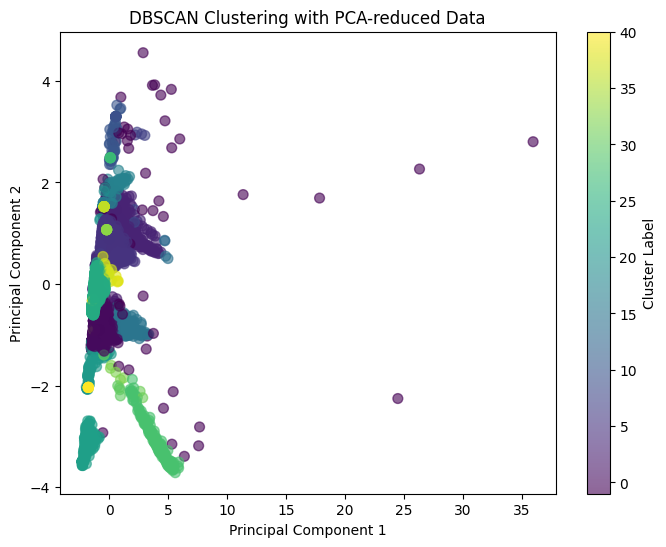

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce the dimensionality to 2 components for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(features_scaled)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.title("DBSCAN Clustering with PCA-reduced Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Label')
plt.show()

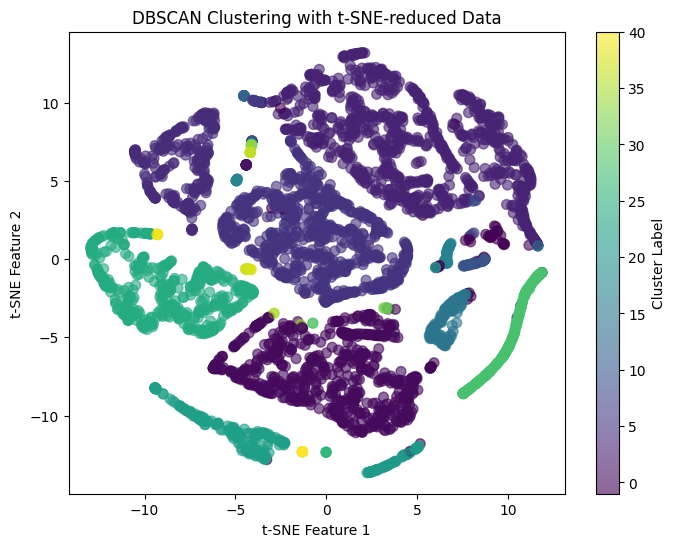

In [41]:
from sklearn.manifold import TSNE

# t-SNE for dimensionality reduction to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
tsne_features = tsne.fit_transform(features_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.title("DBSCAN Clustering with t-SNE-reduced Data")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.colorbar(label='Cluster Label')
plt.show()

In [42]:
!pip install networkx python-louvain



RUNNING COMMUNITY BASED ALGORITHM - GIRVAN NEWMAN

In [50]:
import networkx as nx
from networkx.algorithms.community import girvan_newman



#  Girvan-Newman algorithm
communities = girvan_newman(subG)

#  access the communities
community_list = list(communities)

# first level of communities
print(community_list[0])


({2}, {2059, 2065, 33, 2085, 38, 2097, 53, 62, 2116, 2119, 2122, 75, 77, 78, 80, 83, 88, 91, 2144, 2146, 2150, 106, 116, 117, 2166, 2172, 2174, 129, 2179, 2184, 2218, 171, 2223, 183, 2233, 2246, 2257, 211, 2267, 2270, 235, 2288, 253, 2302, 2316, 274, 2327, 2331, 2333, 2335, 2337, 295, 2345, 298, 299, 2351, 305, 306, 2355, 311, 2360, 2366, 2372, 2394, 348, 353, 2414, 2417, 2430, 2436, 2438, 405, 409, 2462, 417, 2478, 430, 433, 437, 446, 2495, 455, 2506, 2507, 2510, 477, 479, 2529, 2548, 501, 2550, 506, 2567, 520, 2581, 538, 2588, 2591, 2595, 560, 2616, 569, 573, 2622, 576, 2627, 583, 595, 602, 2653, 617, 2666, 619, 2674, 2681, 647, 2696, 2701, 2715, 671, 2720, 2721, 2724, 678, 2727, 683, 2740, 693, 2746, 703, 2758, 711, 714, 716, 2766, 719, 723, 2772, 726, 738, 2789, 2791, 2799, 752, 757, 763, 773, 775, 2824, 2825, 778, 2829, 2832, 792, 2856, 2862, 2867, 2869, 2870, 2879, 2890, 2895, 848, 2908, 861, 2911, 2915, 2916, 2921, 2923, 879, 880, 2932, 2935, 2937, 2939, 2946, 2950, 2951, 2956, 

GRAPH SAMPLING

In [ ]:
# import networkx as nx
# import random

# def random_node_sampling(G, fraction=0.1):
#     sampled_nodes = random.sample(G.nodes(), int(len(G.nodes()) * fraction))
#     return G.subgraph(sampled_nodes)

# def bfs_sampling(G, start_node, depth=2):
#     nodes = set([start_node])
#     nodes.update(nx.single_source_shortest_path_length(G, start_node, depth).keys())
#     return G.subgraph(nodes)


GRAPH PARTITIONING

In [ ]:
# # Assuming the use of a library like METIS for partitioning
# import metis
# import networkx as nx

# def partition_graph(G, num_partitions=4):
#     _, parts = metis.part_graph(G, num_partitions)
#     partitions = [[] for _ in range(num_partitions)]
#     for i, p in enumerate(parts):
#         partitions[p].append(i)
#     return partitions


PARALLEL PROCESSING

In [ ]:
# from joblib import Parallel, delayed
# import networkx as nx

# # Example: Parallel computation of centrality measures
# def compute_centrality(subgraph):
#     return nx.betweenness_centrality(subgraph)

# def parallel_centrality_computation(G, partitions):
#     subgraphs = [G.subgraph(nodes) for nodes in partitions]
#     results = Parallel(n_jobs=-1)(delayed(compute_centrality)(sg) for sg in subgraphs)
#     return results


# STATISTICAL ANALYSIS

In [ ]:
!pip install pandas numpy scipy sklearn matplotlib seaborn


In [48]:
import pandas as pd
import numpy as np
# Example DataFrame setup
# df = pd.DataFrame(data, columns=['Feature1', 'Feature2', ..., 'Cluster'])


In [49]:
from scipy.spatial.distance import pdist, squareform

# calculate average pairwise distance within clusters
def avg_pairwise_distance(features_scaled, cluster_col='Cluster'):
    cluster_distances = {}
    for cluster in features_scaled[cluster_col].unique():
        cluster_data = features_scaled[features_scaled[cluster_col] == cluster].drop(columns=[cluster_col])
        distances = pdist(cluster_data, metric='euclidean')
        avg_distance = np.mean(distances)
        cluster_distances[cluster] = avg_distance
    return cluster_distances

# print average pairwise distances
cluster_distances = avg_pairwise_distance(features_scaled, 'Cluster')
print(cluster_distances)


{2: 2.8396667301443577, 0: 2.319274868270147, 1: 2.521098530363187}


# ***STATISTICAL SUMMARY PER CLUSTER ***

In [51]:
# statistical summaries for each cluster
cluster_summaries = features_scaled.groupby('Cluster').describe()
print(cluster_summaries)


         Degree                                                              \
          count      mean       std       min       25%       50%       75%   
Cluster                                                                       
0        1739.0 -0.475234  0.305016 -0.814495 -0.700022 -0.566470 -0.375681   
1        2094.0  0.146836  0.827408 -0.814495 -0.490154 -0.108578  0.559181   
2         206.0  2.519207  1.846782  0.807206  1.842233  2.371670  2.772325   

                   Clustering_Coefficient            ... Closeness Centrality  \
               max                  count      mean  ...                  75%   
Cluster                                              ...                        
0         0.978915                 1739.0  0.387174  ...            -0.408112   
1         4.012449                 2094.0 -0.394397  ...             1.124394   
2        19.103804                  206.0  0.740646  ...            -0.364862   

                  Betweenness Centrali

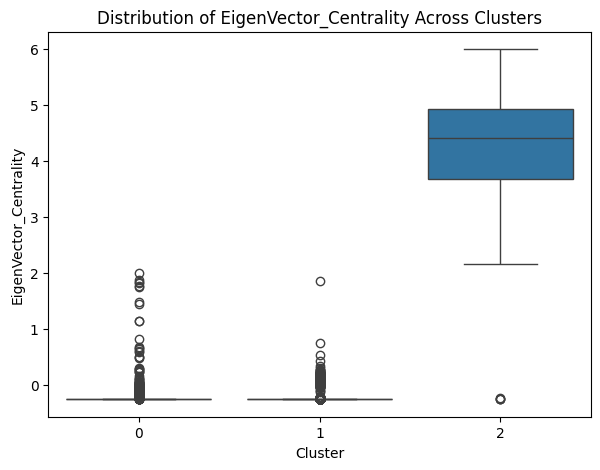

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example feature to visualize
feature_to_visualize = 'EigenVector_Centrality'

plt.figure(figsize=(7, 5))
sns.boxplot(x='Cluster', y=feature_to_visualize, data=features_scaled)
plt.title(f'Distribution of {feature_to_visualize} Across Clusters')
plt.show()


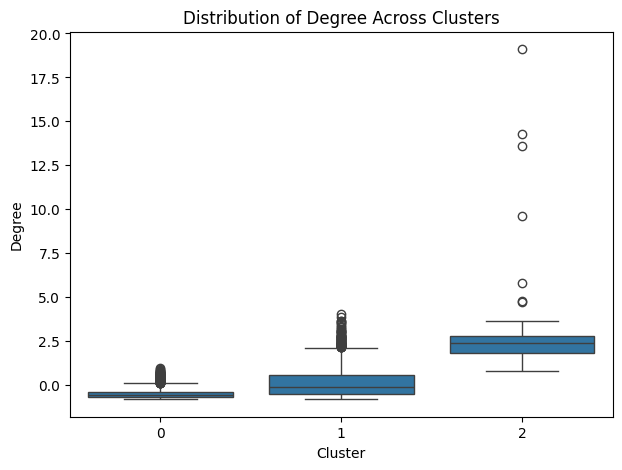

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example feature to visualize
feature_to_visualize = 'Degree'

plt.figure(figsize=(7, 5))
sns.boxplot(x='Cluster', y=feature_to_visualize, data=features_scaled)
plt.title(f'Distribution of {feature_to_visualize} Across Clusters')
plt.show()


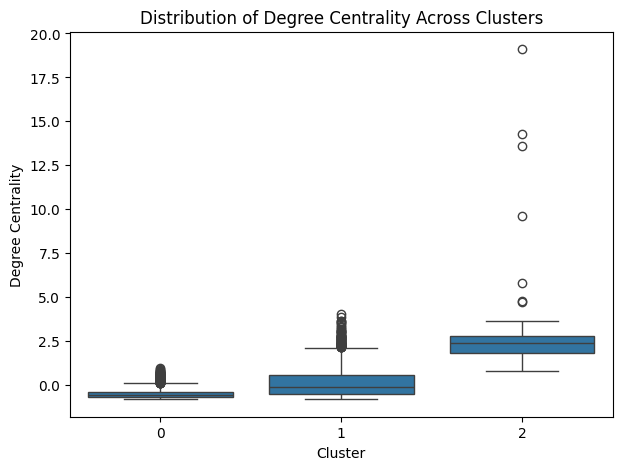

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example feature to visualize
feature_to_visualize = 'Degree Centrality'

plt.figure(figsize=(7, 5))
sns.boxplot(x='Cluster', y=feature_to_visualize, data=features_scaled)
plt.title(f'Distribution of {feature_to_visualize} Across Clusters')
plt.show()




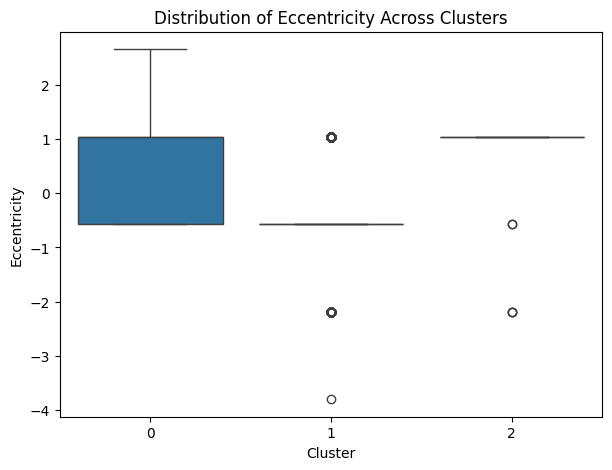

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example feature to visualize
feature_to_visualize = 'Eccentricity'

plt.figure(figsize=(7, 5))
sns.boxplot(x='Cluster', y=feature_to_visualize, data=features_scaled)
plt.title(f'Distribution of {feature_to_visualize} Across Clusters')
plt.show()


